In [1]:
import pandas as pd
import re
import pathlib
import requests

In [2]:
def read_excel_sheets(xls_path):
    """Read all sheets of an Excel workbook and return a single DataFrame"""
    print(f'Loading {xls_path} into pandas')
    xl = pd.ExcelFile(xls_path)
    df = list()
    for idx, name in enumerate(xl.sheet_names):
        # print(f'Reading sheet #{idx}: {name}')

        sheet = xl.parse(name,
                         index_col=[0],
                         skiprows=[96, 97, 99, 100],
                         usecols=lambda x : x != 'Index').T
        sheet.index = sheet.index.map(lambda x: pd.to_datetime(x + '_1', format="_%Y_%m_%d"))
        sheet['Département'] = name

        df.append(sheet)
    return pd.concat(df)

In [3]:
url = "https://www.data.gouv.fr/api/1/datasets/chiffres-departementaux-mensuels-relatifs-aux-crimes-et-delits-enregistres-par-les-services-de-police-et-de-gendarmerie-depuis-janvier-1996/"
crimes_resources = requests.get(url).json()
#
# get list of url to download
#

prog = re.compile(".*\.xlsx")
filenames = {
                d['title']:d['url']
                for d in crimes_resources['resources']
                if prog.match(d['title'])
            }


dfs = {}
for k, v in filenames.items():
    name_db = f'{v[-7:-5]}_db'
    if pathlib.Path(f'{name_db}.pkl').is_file():
        dfs[name_db] = pd.read_pickle(f'{name_db}.pkl')
    else:
        if not pathlib.Path(k).is_file():
            with open(k, 'wb') as file:
                file.write(requests.get(v).content)
        dfs[name_db] = read_excel_sheets(k)
        dfs[name_db].to_pickle(f'{name_db}.pkl')

In [4]:
pn_df = pd.read_pickle('pn_db.pkl')
ts_df = pd.read_pickle('ts_db.pkl')
gn_df = pd.read_pickle('gn_db.pkl')


In [5]:
pd.date_range("2000-01-01", "2022-02-01", freq='MS')

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01'],
              dtype='datetime64[ns]', length=266, freq='MS')

<AxesSubplot:>

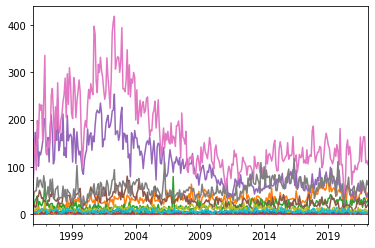

In [6]:
gn_df[gn_df['Département'] == '01'].filter(regex=".*Vols.*").plot(legend=False)

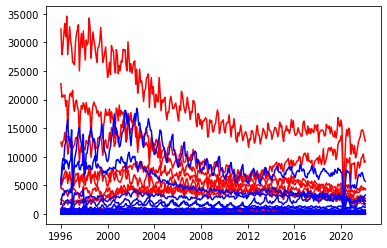

In [7]:
from matplotlib import pyplot as plt
plt.plot()

plt.plot(pn_df[pn_df['Département'] == 'France_Métro'].filter(regex=".*Vols*"), color='red')
plt.plot(gn_df[gn_df['Département'] == 'France_Métro'].filter(regex=".*Vols*"), color='blue')


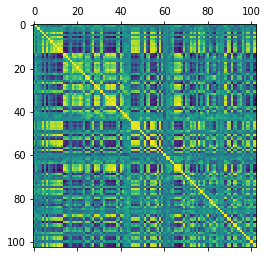

In [8]:
corr_df = pn_df[pn_df['Département'] == 'France_Entière'].sort_index().corr(method='pearson')

plt.matshow(corr_df)
plt.show()

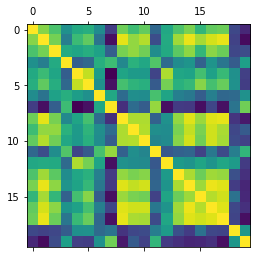

In [9]:
corr_df = pn_df[pn_df['Département'] == 'France_Entière'].sort_index().corr(method='pearson')[pn_df.columns[20:40]][20:40]
plt.matshow(corr_df)
plt.show()

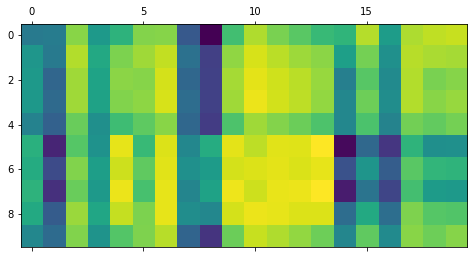

,Règlements de compte entre malfaiteurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,Menaces ou chantages pour extorsion de fonds,Menaces ou chantages dans un autre but,Atteintes à la dignité et à la personnalité,Violations de domicile,Vols à main armée contre des établissements financiers,Vols à main armée contre des établissements industriels ou commerciaux,Vols à main armée contre des entreprises de transports de fonds,Vols à main armée contre des particuliers à leur domicile,Autres vols à main armée,"Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels"
Autres vols simples contre des établissements publics ou privés,0.663290,0.668398,0.891678,0.733977,0.794206,0.887436,0.889090,0.590606,0.436928,0.822113,0.924200,0.879048,0.848335,0.809669,0.798971,0.928944,0.743080,0.922355,0.935744,0.943453
Autres vols simples contre des particuliers dans deslocaux privés,0.727589,0.661916,0.926510,0.770107,0.881186,0.909931,0.938499,0.642580,0.541095,0.897521,0.956199,0.931860,0.908287,0.894279,0.749471,0.873372,0.715035,0.930988,0.919920,0.915544
Autres vols simples contre des particuliers dans des locaux ou lieux publics,0.735695,0.619837,0.910211,0.757516,0.893091,0.889830,0.954730,0.621934,0.542929,0.914984,0.967265,0.949451,0.933005,0.904645,0.675423,0.846090,0.701960,0.926210,0.878838,0.889811
Recels,0.732515,0.628749,0.911094,0.755598,0.885129,0.896009,0.956546,0.634138,0.543741,0.911258,0.974515,0.952310,0.934453,0.901011,0.692578,0.866711,0.708500,0.926665,0.891991,0.903716
Proxénétisme,0.682609,0.609175,0.864404,0.711167,0.818286,0.853503,0.890894,0.620549,0.535794,0.836006,0.909804,0.886266,0.864453,0.834921,0.693019,0.833316,0.683163,0.872118,0.856145,0.875073
Viols sur des majeur(e)s,0.787840,0.494763,0.844819,0.719345,0.968392,0.809620,0.961544,0.692078,0.779237,0.966067,0.934695,0.965417,0.963554,0.988251,0.452010,0.623057,0.524258,0.796578,0.712352,0.713462
Viols sur des mineur(e)s,0.777428,0.563576,0.885445,0.746418,0.946926,0.855375,0.964672,0.713445,0.739281,0.953872,0.960425,0.967593,0.959151,0.969821,0.577175,0.724165,0.599679,0.848679,0.801298,0.796248
Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,0.794241,0.514091,0.863833,0.735146,0.974226,0.829419,0.968487,0.688490,0.755025,0.976237,0.946929,0.971933,0.973415,0.989661,0.479293,0.649037,0.551727,0.825152,0.739351,0.736745
Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,0.772972,0.597437,0.906806,0.764502,0.941580,0.880054,0.968120,0.707616,0.693436,0.954908,0.972945,0.969431,0.959912,0.960261,0.633644,0.772569,0.637328,0.883043,0.844256,0.839434
Atteintes sexuelles,0.693531,0.629280,0.885615,0.720342,0.842799,0.882140,0.930322,0.614266,0.520663,0.865698,0.943464,0.923418,0.899450,0.867431,0.690288,0.855532,0.700994,0.890617,0.868000,0.888931


In [10]:
corr_df = pn_df.sort_index().corr(method='pearson')[pn_df.columns[0:20]][40:50]
plt.matshow(corr_df)
plt.show()
corr_df

In [11]:
pn_df.groupby('Département').sum().T.sum().sort_values()
pn_df[pn_df.Département == '972']

,Règlements de compte entre malfaiteurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,Marchandage - prêt de main d'oeuvre,"Banqueroutes, abus de biens sociaux et autres délits de société","Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,Département
2022-02-01,0.0,0.0,0.0,0.0,4.0,0.0,93.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,972
2022-01-01,0.0,0.0,3.0,1.0,2.0,0.0,110.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.0,972
2021-12-01,0.0,1.0,0.0,1.0,6.0,1.0,95.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,22.0,972
2021-11-01,0.0,0.0,0.0,0.0,10.0,0.0,96.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,972
2021-10-01,0.0,0.0,0.0,0.0,4.0,0.0,109.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-05-01,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,972
2000-04-01,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,972
2000-03-01,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,972
2000-02-01,0.0,0.0,0.0,0.0,4.0,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,972


In [43]:

tag_df = pd.read_csv("crime_categories.txt").set_index(pn_df.columns[:-1])

In [44]:
pn_df[tag_df[tag_df['Vol'] & tag_df['Arme']].index]

,Vols à main armée contre des établissements financiers,Vols à main armée contre des établissements industriels ou commerciaux,Vols à main armée contre des entreprises de transports de fonds,Vols à main armée contre des particuliers à leur domicile,Autres vols à main armée,"Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels",Vols avec armes blanches contre des particuliers à leur domicile,Autres vols avec armes blanches
2022-02-01,5.0,30.0,0.0,29.0,77.0,30.0,31.0,306.0
2022-01-01,7.0,46.0,0.0,21.0,80.0,35.0,21.0,315.0
2021-12-01,10.0,43.0,1.0,32.0,79.0,35.0,34.0,348.0
2021-11-01,11.0,31.0,0.0,26.0,95.0,33.0,32.0,356.0
2021-10-01,5.0,51.0,0.0,23.0,102.0,39.0,36.0,338.0
...,...,...,...,...,...,...,...,...
2000-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
